In [1]:
from scipy.stats import skew 
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
%matplotlib inline
#Loading datasetwinequality.csv
df = pd.read_csv('/home/tanya/Desktop/Wine_data/winequality.csv',delimiter=";")
#Let's check how the data is distributed
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [2]:
n_wines = df.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = df.loc[(df['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 5
quality_below_5 = df.loc[(df['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6
quality_between_5 = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))

# Some more additional data analysis
display(np.round(df.describe()))

Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1319
Percentage of wines with quality 7 and above: 13.57%


fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1599.0            1599.0       1599.0          1599.0   
mean             8.0               1.0          0.0             3.0   
std              2.0               0.0          0.0             1.0   
min              5.0               0.0          0.0             1.0   
25%              7.0               0.0          0.0             2.0   
50%              8.0               1.0          0.0             2.0   
75%              9.0               1.0          0.0             3.0   
max             16.0               2.0          1.0            16.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1599.0               1599.0                1599.0   1599.0  1599.0   
mean         0.0                 16.0                  46.0      1.0     3.0   
std          0.0                 10.0                  33.0      0.0     0.0   
min          0.0                  1.0                   6.0      1.0     3.0   
25%          0.0                  7.0                  22.0      1.0     3.0   
50%          0.0                 14.0                  38.0      1.0     3.0   
75%          0.0                 21.0                  62.0      1.0     3.0   
max          1.0                 72.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality  
count     1599.0   1599.0   1599.0  
mean         1.0     10.0      6.0  
std          0.0      1.0      1.0  
min          0.0      8.0      3.0  
25%          1.0     10.0      5.0  
50%          1.0     10.0      6.0  
75%          1.0     11.0      6.0  
max          2.0     15.0      8.0

Text(0, 0.5, '19188')

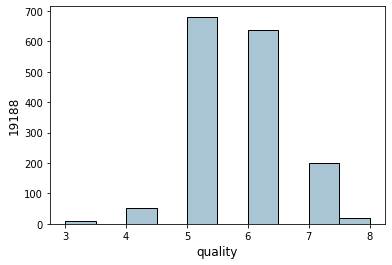

In [3]:
fig, ax = plt.subplots()
df['quality'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
#ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('quality', fontsize=12)
ax.set_ylabel(df.size, fontsize=12)

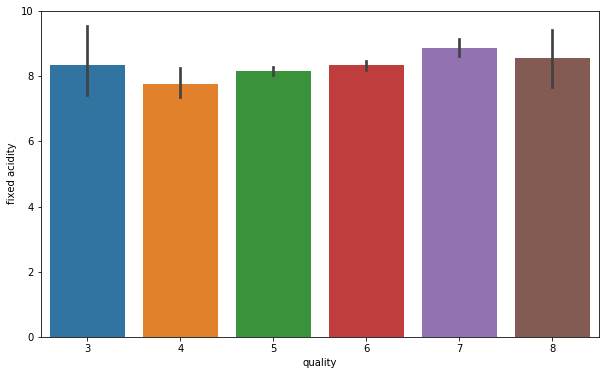

In [4]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

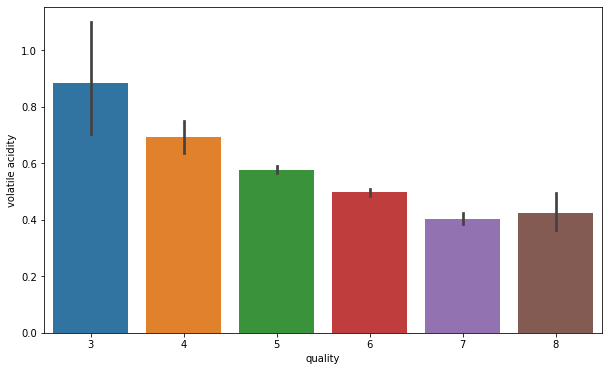

In [5]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

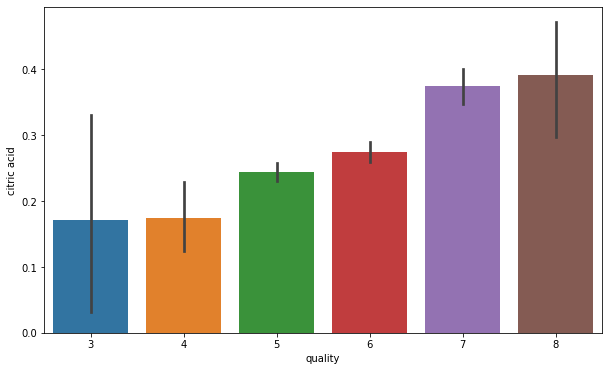

In [6]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

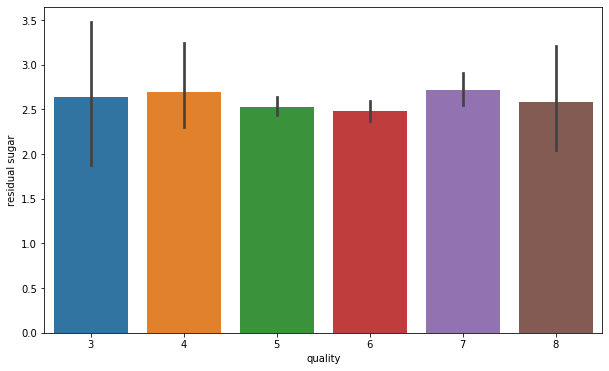

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

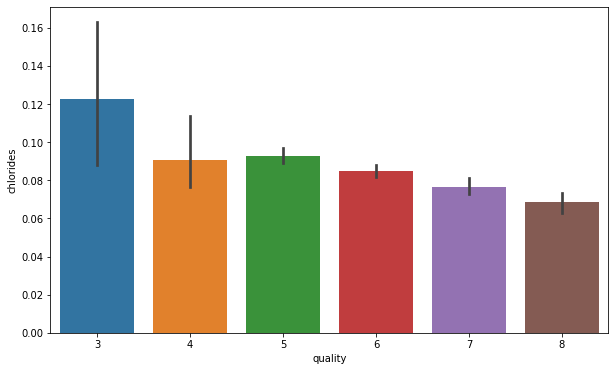

In [8]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)


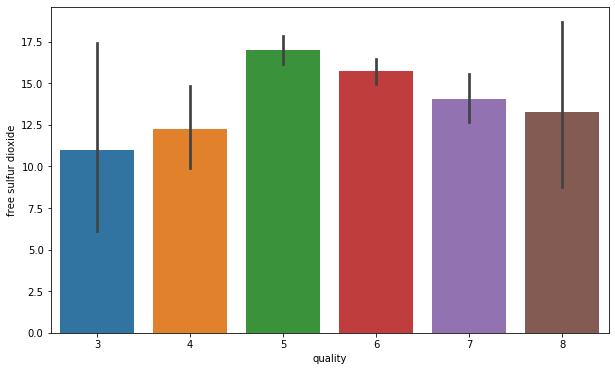

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

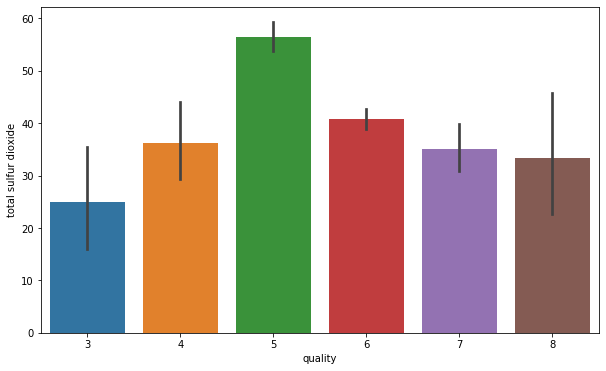

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

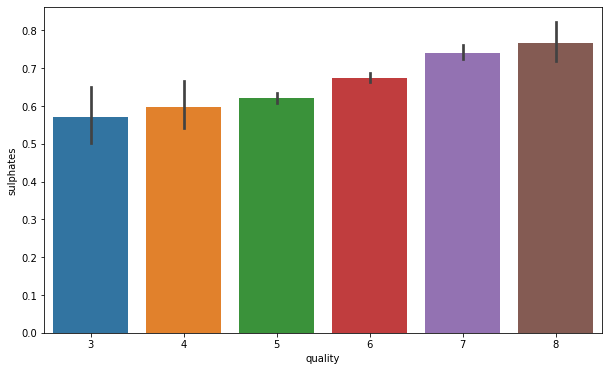

In [11]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

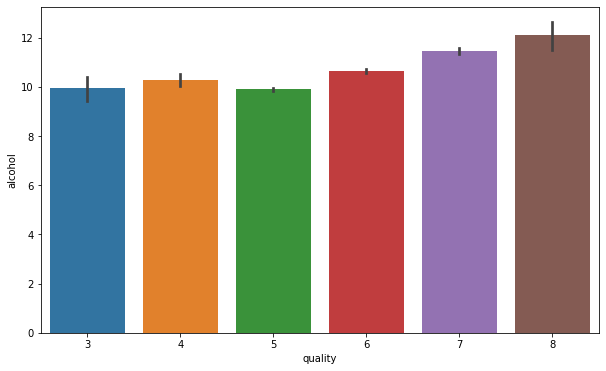

In [12]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [13]:
correlation = df.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [14]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = df[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [15]:
x = df.iloc[:,:11]
y = df['pH']

In [16]:
x.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
5      9.4  
6      9.4  
7     10.0  
8      9.5  
9     10.5

In [17]:
y.head(10)

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
7    3.39
8    3.36
9    3.35
Name: pH, dtype: float64

In [26]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [27]:
#Input data for training and split of data
#converting float values to int for better conversion

training_data_X    = np.array([ [1.2, 6.7, 2.7],  [2.3, 4.6, 2.2],  [0.3, 3.9, 0.8],  [2.1, 1.3, 4.3]  ])
training_scores_Y  = np.array( [1.4, 9.2, 2.5, 2.2] )
prediction_data_test  = np.array([ [1.5, 3.4, 2.2],  [7.6, 7.2, 0.2] ])

In [37]:
# Defining labels and using Logistic Regression model to fit the wine data 

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
model = sklearn.linear_model.LogisticRegression()
Y,X = dmatrices('rate_code ~ alcohol + sulphates', data = df)
model.fit(X, Y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(Y, yhat))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
